In [1]:
%pip install colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import math
import requests
import csv
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from colour import Color
import seaborn as sns

# data from https://www.pro-football-reference.com/years/2022/defense_advanced.htm

Mounted at /content/drive


In [3]:
deftable = pd.read_csv('/content/drive/MyDrive/senior_project_2023/tablestats.txt')
deftable.columns = deftable.iloc[0]
deftable = deftable[1:]
deftable = deftable.dropna()
deftable['Player'] = deftable['Player'].str.replace("[+*]","")

z = deftable['Pos']

y = deftable['Rat'].values

# deftable = deftable.drop(['Rat'], axis=1)
deftable = deftable.drop(['Cmp%'], axis=1)


x = deftable.iloc[:, 7:18].values


<ipython-input-3-ce020bc593ca>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  deftable['Player'] = deftable['Player'].str.replace("[+*]","")


In [4]:
from sklearn.preprocessing import StandardScaler

features = list(deftable.columns)[7:18]

# Standardizing the features
x = StandardScaler().fit_transform(x)



In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)

principalComponents = pca.fit_transform(x)

labs = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5',
           'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10',
           'principal component 11']

principalDf = pd.DataFrame(data = principalComponents,
                           columns = labs)



In [6]:
finalDf = pd.concat([principalDf, z], axis = 1)

finalDf


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,Pos
0,4.029438,-1.659072,-2.298888,1.954031,-1.248192,-0.659438,0.445800,0.360566,0.175729,-0.285190,-5.474903e-15,NaN
1,4.192885,-1.386072,-0.979058,2.012831,0.025702,-1.164819,0.067756,-0.128023,-0.112994,-0.236300,8.823863e-15,LB
2,5.352733,-0.162023,-3.046463,0.929649,0.066505,-0.002078,2.056646,-0.690181,-0.917176,0.215904,3.485514e-15,LB
3,3.326715,-1.706986,0.280182,1.161544,0.905191,-0.868076,0.388268,0.249465,0.231368,-0.048062,-4.951059e-15,LB
4,2.639090,-1.445012,-1.856382,2.194852,-1.189183,-0.957625,0.639277,0.066419,0.027604,-0.026446,-4.756134e-16,LB
...,...,...,...,...,...,...,...,...,...,...,...,...
901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE
906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CB
910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CB
911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE


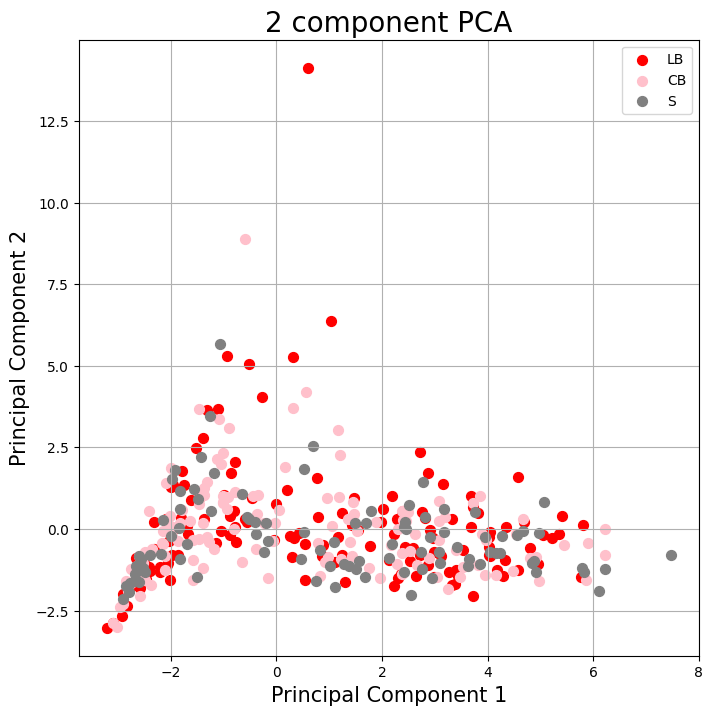

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['LB', 'CB', 'S']
colors = ['red', 'pink', 'grey']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Pos'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

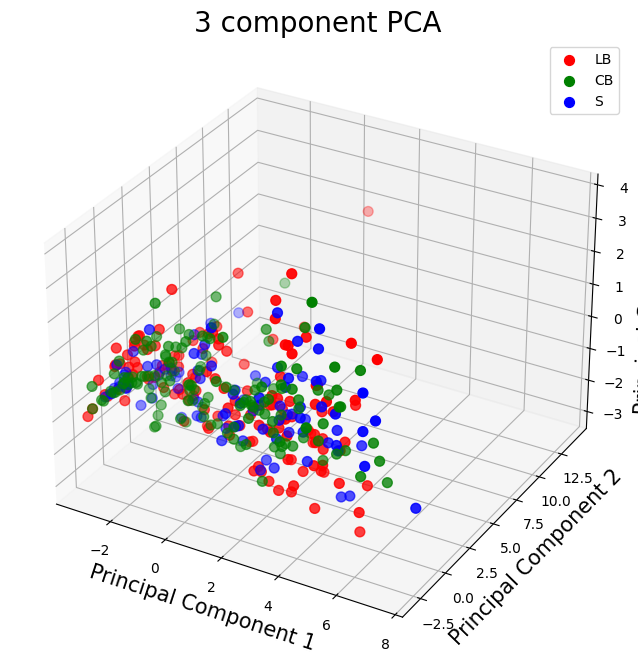

In [8]:
sup = plt.figure(figsize = (8,8))
sub = sup.add_subplot(projection='3d') 
sub.set_xlabel('Principal Component 1', fontsize = 15)
sub.set_ylabel('Principal Component 2', fontsize = 15)
sub.set_zlabel('Principal Component 3', fontsize = 15)
sub.set_title('3 component PCA', fontsize = 20)

targets = ['LB', 'CB', 'S']
colors = ['red', 'green', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Pos'] == target
    sub.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
sub.legend(targets)
plt.show()

<ipython-input-9-86bc3054424a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ep1.set_xticklabels(labs, rotation = 90)


0.8346531887915916


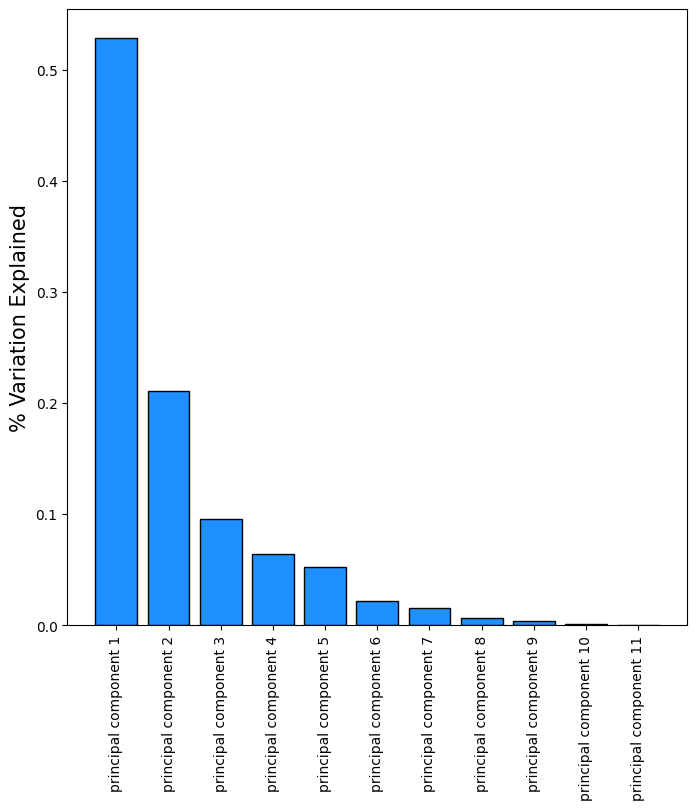

In [9]:
n1 = [float(i)/sum(pca.explained_variance_) for i in pca.explained_variance_]

epf1 = plt.figure(figsize = (8,8))
ep1 = epf1.add_subplot(1,1,1) 
ep1.bar(x = labs, height = n1, color = 'dodgerblue', edgecolor = 'black')
ep1.set_xticklabels(labs, rotation = 90)
ep1.set_ylabel('% Variation Explained', fontsize = 15)


print(sum(n1[0:3]))

In [10]:
pca2 = PCA(n_components=2)

principalComponents2 = pca2.fit_transform(x)

principalDf2 = pd.DataFrame(data = principalComponents2,
                           columns = ['principal component 1', 'principal component 2'])



In [11]:
pca3 = PCA(n_components=11)

principalComponents3 = pca3.fit_transform(x)

principalDf3 = pd.DataFrame(data = principalComponents3)
#                           columns = ['principal component 1', 'principal component 2'])


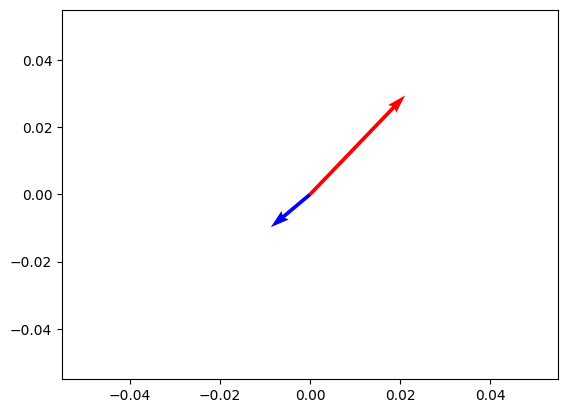

In [12]:
v = np.array([principalDf2['principal component 1'], principalDf2['principal component 2']])
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, v[:,0], v[:,1], color=['r','b'], scale=21)
plt.show()

In [13]:
z2 = deftable['Player']

finalDf3 = pd.concat([principalDf, z2], axis = 1)

finalDf3 = finalDf3.dropna()

finalDf3 = finalDf3.set_index('Player')

<ipython-input-14-9d6ab613b231>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  v1.set_xticklabels(labels = list(deftable.columns)[7:18], rotation = 45, fontsize = 15)


[Text(0, 0, 'Int'),
 Text(1, 0, 'Tgt'),
 Text(2, 0, 'Cmp'),
 Text(3, 0, 'Yds'),
 Text(4, 0, 'Yds/Cmp'),
 Text(5, 0, 'Yds/Tgt'),
 Text(6, 0, 'TD'),
 Text(7, 0, 'Rat'),
 Text(8, 0, 'DADOT'),
 Text(9, 0, 'Air'),
 Text(10, 0, 'YAC')]

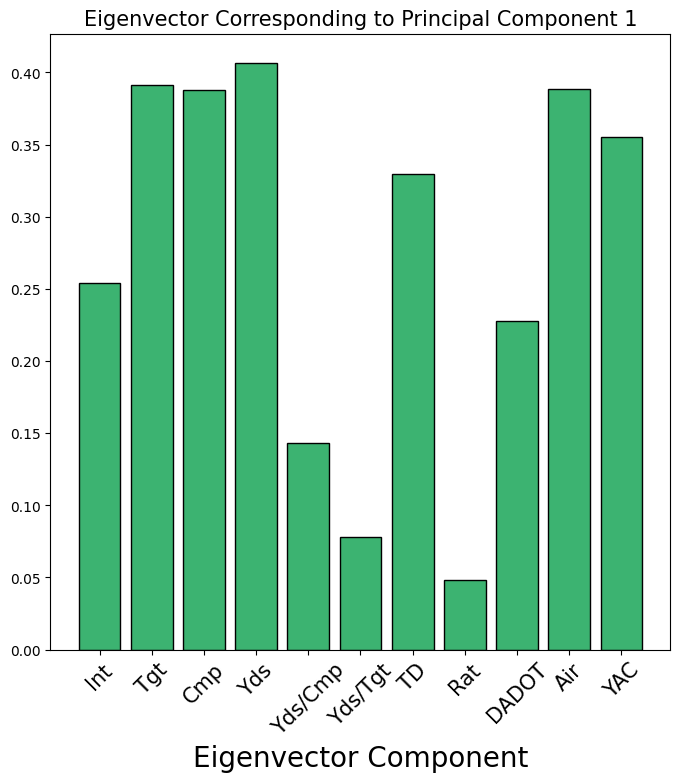

In [14]:
vf1 = plt.figure(figsize = (8,8))
v1 = vf1.add_subplot(1,1,1) 
v1.bar(x = list(deftable.columns)[7:18], height = pca3.components_[0], color = 'mediumseagreen', edgecolor = 'black')
v1.set_xlabel('Eigenvector Component', fontsize = 20)
v1.set_title('Eigenvector Corresponding to Principal Component 1', fontsize = 15)
v1.set_xticklabels(labels = list(deftable.columns)[7:18], rotation = 45, fontsize = 15)


<ipython-input-15-2b40d0755447>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  v2.set_xticklabels(labels = list(deftable.columns)[7:18], rotation = 45)


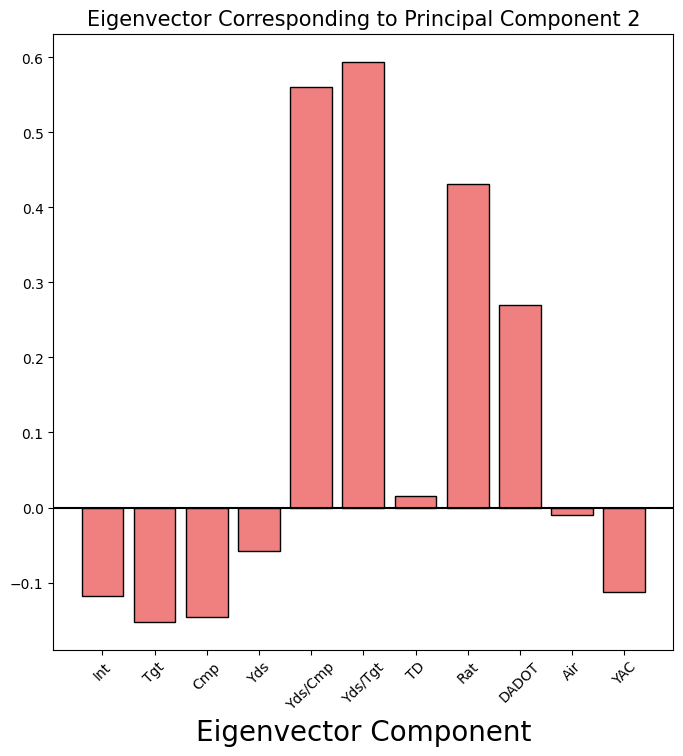

In [15]:
vf2 = plt.figure(figsize=(8,8))
v2 = vf2.add_subplot(1,1,1) 
v2.bar(x = list(deftable.columns)[7:18], height = pca3.components_[1], color = 'lightcoral', edgecolor = 'black')
v2.set_xlabel('Eigenvector Component', fontsize = 20)
v2.set_title('Eigenvector Corresponding to Principal Component 2', fontsize = 15)
v2.set_xticklabels(labels = list(deftable.columns)[7:18], rotation = 45)
v2.axhline(y=0, c = 'k')

<ipython-input-16-e3555ae9fa54>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  v3.set_xticklabels(labels = list(deftable.columns)[7:18], rotation = 45)


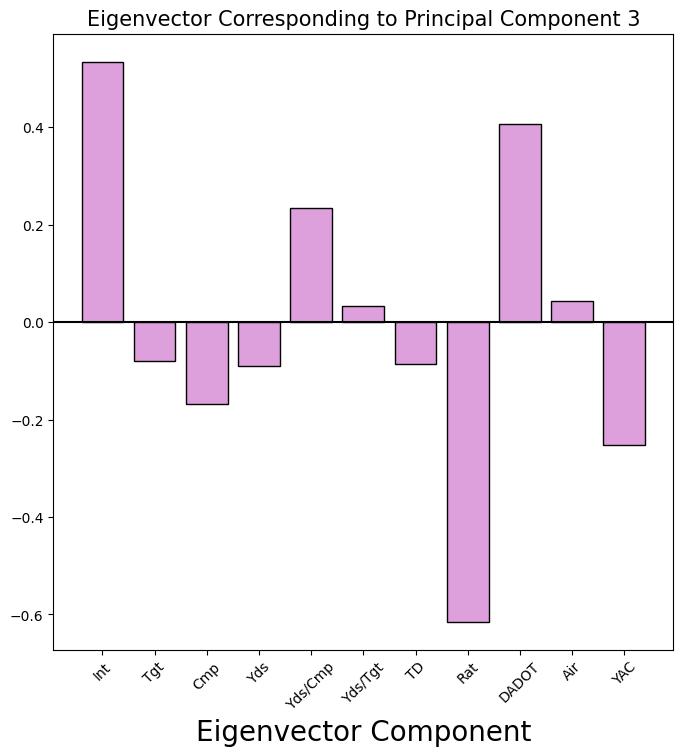

In [16]:
vf3 = plt.figure(figsize=(8,8))
v3 = vf3.add_subplot(1,1,1) 
v3.bar(x = list(deftable.columns)[7:18], height = pca3.components_[2], color = 'plum', edgecolor = 'black')
v3.set_xlabel('Eigenvector Component', fontsize = 20)
v3.set_title('Eigenvector Corresponding to Principal Component 3', fontsize = 15)
v3.set_xticklabels(labels = list(deftable.columns)[7:18], rotation = 45)
v3.axhline(y = 0, c = 'k')

In [17]:
red = Color("red")
ro = list(red.range_to(Color("orange"), finalDf3.shape[0]))

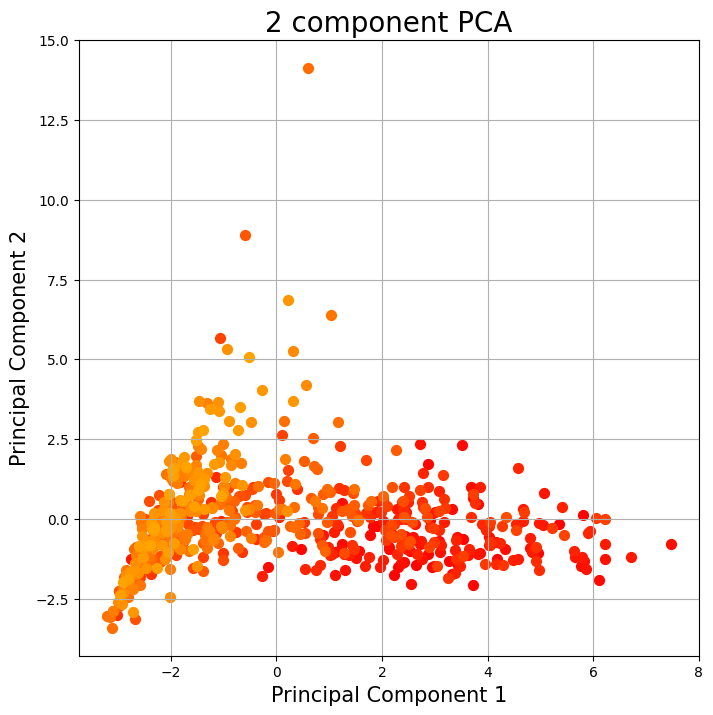

In [18]:
fig3 = plt.figure(figsize = (8,8))
ax3 = fig3.add_subplot(1,1,1) 
ax3.set_xlabel('Principal Component 1', fontsize = 15)
ax3.set_ylabel('Principal Component 2', fontsize = 15)
ax3.set_title('2 component PCA', fontsize = 20)


targets3 = z2
colors3 = ro
for target, color in zip(targets3,colors3):
    indicesToKeep = finalDf3.index == target
    ax3.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = str(color)
               , s = 50)
# ax2.legend(targets3)
ax3.grid()

In [19]:
heights = pd.read_csv('/content/drive/MyDrive/senior_project_2023/body.csv')
av = pd.read_csv('/content/drive/MyDrive/senior_project_2023/av.csv')

drops = ['Season', 'Age', 'Team', 'G', 'GS', 'Ht..1',
       'BMI', 'Pos', 'Draft', '-9999']

heights = heights.drop(drops, axis=1)

heights = heights.to_dict()
av = av.to_dict()

hdf = pd.DataFrame(heights)
adf = pd.DataFrame(av)

hdf = pd.merge(left=hdf, right=adf, on = 'Player').set_index('Player')

hdf

,Ht.,Wt.,AV,-9999
Player,,,,
Calais Campbell,6-8,300,7,CampCa99
Arik Armstead,6-7,290,4,ArmsAr01
DeForest Buckner,6-7,295,8,BuckDe00
Raekwon Davis,6-7,330,6,DaviRa03
Aidan Hutchinson,6-7,265,8,HutcAi00
...,...,...,...,...
Duke Shelley,5-9,176,2,ShelDu00
Antoine Winfield Jr.,5-9,203,5,WinfAn00
Marcus Jones,5-8,185,10,JoneMa06


In [20]:
players = deftable.set_index('Player')
players2 = pd.merge(left = players, right = hdf, left_on = players.index, right_on = hdf.index)
players2 = players2.drop(['Bltz', 'Hrry', 'QBKD', 'Sk', 'Prss', 'Comb', 'MTkl', 'MTkl%', '-9999_x', '-9999_y'], axis=1)
players2 = players2.rename({'key_0':'player'}, axis = 1)


In [21]:
def ht2in(ht):
  small = ht.split('-')
  small = [int(i) for i in small]
  inin = 12*small[0] + small[1]
  return inin

newht = list(map(ht2in, players2['Ht.'].to_list()))
players2['Ht.'] = newht

In [22]:
players2[players2.columns[7:]] = players2[players2.columns[7:]].apply(pd.to_numeric)
players2

,player,Rk,Tm,Age,Pos,G,GS,Int,Tgt,Cmp,...,Yds/Cmp,Yds/Tgt,TD,Rat,DADOT,Air,YAC,Ht.,Wt.,AV
0,Foyesade Oluokun,1,JAX,27,LB,17,17,0,90,71,...,7.9,6.2,1,96.3,3.4,187,374,74,215,8
1,Nick Bolton,2,KAN,22,LB,17,17,2,74,61,...,9.5,7.8,1,92.6,3.7,214,366,72,237,7
2,Jordyn Brooks,3,SEA,25,LB,16,16,0,75,54,...,12.8,9.2,5,122.6,5.0,194,495,72,240,7
3,Roquan Smith,4,2TM,25,LB,17,17,3,69,49,...,8.6,6.1,2,78.1,4.4,153,266,73,232,17
4,Zaire Franklin,5,IND,26,LB,17,17,0,73,55,...,8.3,6.3,0,91.1,2.9,102,357,72,235,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,Chase Lucas,886,DET,25,CB,6,0,0,1,1,...,6.0,6.0,0,91.7,3.0,3,3,72,185,0
541,Darius Phillips,890,DEN,27,CB,9,0,0,1,1,...,5.0,5.0,0,87.5,-7.0,-7,12,70,190,0
542,Channing Tindall,893,MIA,22,LB,16,0,0,1,1,...,9.0,9.0,0,104.2,6.0,6,3,74,230,1
543,Joshuah Bledsoe,900,NWE,24,S,3,0,0,4,2,...,8.5,4.3,2,101.0,19.3,17,0,72,200,0


In [23]:
grades = pd.read_csv('/content/drive/MyDrive/senior_project_2023/defense_summary.csv')
grades = grades[['player', 'grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense',
       'grades_run_defense', 'grades_tackle']]


grades1 = pd.merge(grades, players2, on = 'player')

grades2 = grades1[['player', 'grades_coverage_defense', 'grades_defense',
                   'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle', 'Int', 
                   'Rat', 'Tgt', 'Cmp', 'Yds', 'TD', 'YAC', 'AV', 'Yds/Cmp']]

grades3 = grades2.loc[(grades2[['Tgt', 'Cmp', 'Yds', 'YAC']]!=0).any(axis=1)]

grades3



,player,grades_coverage_defense,grades_defense,grades_pass_rush_defense,grades_run_defense,grades_tackle,Int,Rat,Tgt,Cmp,Yds,TD,YAC,AV,Yds/Cmp
0,Brandon Graham,79.5,89.8,89.8,69.7,44.5,0,79.2,2,2,2,0,3,2,1.0
1,Jason Pierre-Paul,59.1,56.5,56.0,58.7,40.4,1,53.5,3,3,19,0,15,6,6.3
2,Kareem Jackson,60.9,64.5,56.7,71.3,57.4,0,100.2,59,34,470,3,218,6,13.8
3,Devin McCourty,67.6,70.0,53.8,74.8,90.0,4,72.1,37,19,273,4,63,6,14.4
4,Jerry Hughes,68.1,71.4,71.3,59.7,25.6,1,59.7,6,5,47,0,65,8,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,Rodney Thomas II,54.8,54.3,52.5,55.4,71.5,4,90.3,31,18,296,4,95,4,16.4
512,Jaylen Watson,59.9,61.2,77.9,58.6,58.2,1,103.9,71,46,515,5,147,3,11.2
513,Joshua Williams,64.6,63.0,41.2,67.5,58.3,1,104.9,50,28,374,5,118,2,13.4
514,Gregory Junior,70.7,71.4,NaN,61.9,79.3,0,86.2,5,3,41,0,4,0,13.7
